# Bregman Proximal Point Method Example

## Import the required libraries

In [1]:
import pepflow as pf
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Define the functions

In [2]:
f = pf.ConvexFunction(is_basis=True, tags=["f"])
h = pf.ConvexFunction(is_basis=True, tags=["h"])
# h = pf.SmoothStronglyConvexFunction(is_basis=True, tags=["h"], L=1, mu=0.5)

## Write a function to return the PEPContext associated with Bregman Proximal Point Method

In [3]:
def make_ctx_bppm(
    ctx_name: str, N: int | sp.Integer, stepsize: pf.Parameter
) -> pf.PEPContext:
    ctx_bppm = pf.PEPContext(ctx_name).set_as_current()
    # Declare the initial points.
    x = pf.Vector(is_basis=True, tags=["x_0"])
    f.set_stationary_point("x_star")
    for i in range(N):
        x = f.bregman_proximal_step(x, stepsize, h)
        x.add_tag(f"x_{i + 1}")
    return ctx_bppm

## Numerical evidence of convergence of BPPM

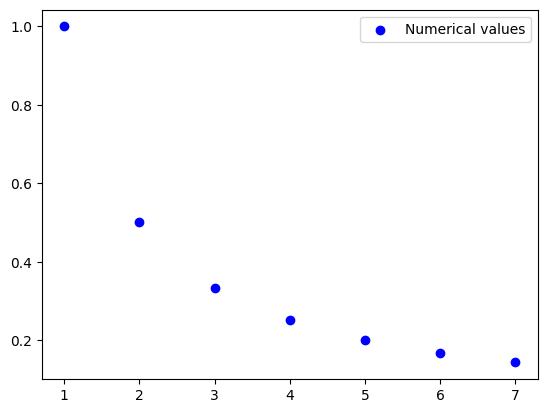

In [4]:
N = 8
alpha = pf.Parameter("alpha")
R = pf.Parameter("R")
alpha_value = 1
R_value = 1

ctx_plt = make_ctx_bppm(ctx_name="ctx_plt", N=N, stepsize=alpha)

x_0 = ctx_plt["x_0"]
x_star = ctx_plt["x_star"]

pb_plt = pf.PEPBuilder(ctx_plt)
pb_plt.add_initial_constraint(
    (h(x_star) - h(x_0) - h.grad(x_0) * (x_star - x_0)).le(R, name="initial_condition")
)

opt_values = []
for k in range(1, N):
    x_k = ctx_plt[f"x_{k}"]
    pb_plt.set_performance_metric(f(x_k) - f(x_star))
    result = pb_plt.solve(resolve_parameters={"alpha": alpha_value, "R": R_value})
    opt_values.append(result.opt_value)

iters = np.arange(1, N)
# cont_iters = np.arange(1, N, 0.01)
# plt.plot(
#     cont_iters,
#     L_value / (4 * cont_iters),
#     "r-",
#     label="Analytical bound $\\frac{L}{4k}$",
# )
plt.scatter(iters, opt_values, color="blue", marker="o", label="Numerical values")
plt.legend()

In [5]:
print(opt_values)

[np.float64(1.0000007264782464), np.float64(0.49999977641913823), np.float64(0.33333215887087353), np.float64(0.24999670984251), np.float64(0.20001158306714076), np.float64(0.16667223097442985), np.float64(0.14286340493919134)]
